In [2]:
#setting up environ and importing necesarry libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [3]:
#Installing another library package (wordcloud)

!pip install wordcloud

In [3]:
import wordcloud

In [7]:
help(wordcloud)

Help on package wordcloud:

NAME
    wordcloud

PACKAGE CONTENTS
    __main__
    _version
    color_from_image
    query_integral_image
    tokenization
    wordcloud
    wordcloud_cli

CLASSES
    builtins.object
        wordcloud.color_from_image.ImageColorGenerator
        wordcloud.wordcloud.WordCloud
    
    class ImageColorGenerator(builtins.object)
     |  ImageColorGenerator(image, default_color=None)
     |  
     |  Color generator based on a color image.
     |  
     |  Generates colors based on an RGB image. A word will be colored using
     |  the mean color of the enclosing rectangle in the color image.
     |  
     |  After construction, the object acts as a callable that can be passed as
     |  color_func to the word cloud constructor or to the recolor method.
     |  
     |  Parameters
     |  ----------
     |  image : nd-array, shape (height, width, 3)
     |      Image to use to generate word colors. Alpha channels are ignored.
     |      This should be the s

In [4]:
data = pd.read_csv("startup_funding.csv")

In [5]:
data.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [6]:
data.shape

(3044, 10)

In [7]:
data.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Remarks'],
      dtype='object')

In [8]:
data[data["Industry Vertical"] == "E-commerce"][['Industry Vertical', 'SubVertical']]

,Industry Vertical,SubVertical
2,E-commerce,Retailer of baby and toddler products
91,E-commerce,Fashion and Shopping
96,E-commerce,Retail
99,E-commerce,Online Medicine
100,E-commerce,Waste Management
105,E-commerce,Fashion and Apparel
108,E-commerce,Software Solutions
109,E-commerce,Lending Platform
393,E-commerce,Food and Beverages
394,E-commerce,Sports Nutrition Supplement etailer


In [9]:
#Starting out with column Remark
pd.set_option("max_rows", 400)
data["Remarks"].isnull().sum()

2625

In [10]:
#Check out non empty columns

data[~data["Remarks"].isnull()][["Remarks"]].value_counts()

Remarks                                                                          
Series A                                                                             175
Series B                                                                              63
Pre-Series A                                                                          37
Series C                                                                              28
Series D                                                                              11
Strategic Investment                                                                  11
Late Stage                                                                             9
Strategic Funding                                                                      6
At the 10 minute million event                                                         6
pre-Series A                                                                           6
Bridge Round                

> Seeing that the columns missing are much and the content of the column is a repetition trying to describe the investment type or stage, we drop it

In [11]:
data.drop("Remarks", axis = 1, inplace = True)

In [12]:
display(data.sample(4))
data.shape

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
1182,1183,28/12/2016,BookEventz,Consumer Internet,Online event-booking platform,Mumbai,"Lead Angels, Mumbai Angels, LetsVenture, Giris...",Seed Funding,NaN
1344,1345,05/09/2016,Social Quotient,Technology,Platform for Social Causes,Mumbai,"Anita Dongre, Yash Dongre, Milind Sarwate",Seed Funding,NaN
102,103,12/04/2019,Azah,Health and Wellness,Organic wellness,Gurugram,Unnamed angel investors,Seed Funding,"2,00,000"
1582,1583,08/06/2016,Shopwati,Consumer Internet,Online Fashion Discussion Community,Gurgaon,Sanjiv Rai,Seed Funding,NaN


(3044, 9)

In [13]:
#Check out the rest of the colmns and check for columns with missing value percentages over 100%

(data.isnull().sum(axis = 0)/len(data))*100

Sr No                 0.000000
Date dd/mm/yyyy       0.000000
Startup Name          0.000000
Industry Vertical     5.617608
SubVertical          30.749014
City  Location        5.913272
Investors Name        0.788436
InvestmentnType       0.131406
Amount in USD        31.537451
dtype: float64

In [14]:
#Dealing with Vertical and Subvertical column together
#Check to see data that have values in the vertical but not in subverical
x = data[(~data["Industry Vertical"].isnull()) & (data["SubVertical"].isnull())][["Sr No", "Industry Vertical", "SubVertical"]]
#Now check for each Industrial Vertical

In [15]:
#Let us drop rows that hav their Industry Category empty
#First check where the industry verical is null and ther is value for sub vertical --- Result is empty, proceed with droppinf
display(data[(~data["SubVertical"].isnull()) & (data["Industry Vertical"].isnull())][["Sr No", "Industry Vertical", "SubVertical"]])

data = data[~(data["Industry Vertical"].isnull())]

,Sr No,Industry Vertical,SubVertical


In [16]:
data.isnull().sum(axis = 0)

Sr No                  0
Date dd/mm/yyyy        0
Startup Name           0
Industry Vertical      0
SubVertical          765
City  Location         9
Investors Name        24
InvestmentnType        4
Amount in USD        920
dtype: int64

In [17]:
#Check the value counts for each category for the subcategories missing to verify that each subcategory missing is little w.r.t the category they rep and replace them 

x = data[(~data["Industry Vertical"].isnull()) & (data["SubVertical"].isnull())][["Sr No", "Industry Vertical", "SubVertical"]]

x["Industry Vertical"].value_counts().sort_values(ascending = False)

Online Food Delivery                        5
Online Education Platform                   5
Big Data & Analytics platform               3
Food Delivery Platform                      3
Hyperlocal Handyman Services                3
                                           ..
On-Demand Beauty Services                   1
Holiday Resort Chain                        1
Automated Storage & Warehousing Solution    1
Hyperlocal Shopping App                     1
Price Comparison                            1
Name: Industry Vertical, Length: 725, dtype: int64

##### Pause to Reflect

>- since the sub vertical missing is very small in relation to their respective Industry Vertical
>- Let us replace the each Indsutry Vertical's subvertical with the mode of the subvertical present under them.
>- Else name the rest others i.e. subverticals that do not have antecedent subverticals (a industry with no subvertica)

In [18]:
def replace_(data, vertical, subvertical):     #Note vertical and subvertical must be strings
    x_dict = {}
    for key in data[vertical].value_counts().keys():
        if len(data[data[vertical]==key][subvertical]) == data[data[vertical]==key][subvertical].isnull().sum():  
            #Checks if the whole subvertical values under a particular vertical is all empty,
            #If it is empty i.e length of the subvertical rows equal to number of rows that is null. Then assign name of vertical to it, else mode of the subvertical is given
            x_dict[key] = key
        else:
            x_dict[key] = data[data[vertical] == key][subvertical].mode()[0]
            pass
    for key in x_dict.keys():
        data.loc[(data[vertical] == key) & (data[subvertical].isnull()), subvertical]  = x_dict[key]
##Using loc indexing that uses a boolean feature and column specification, doc helped out
#Code helps to match the maximum subcategory under each category to the missing values of their subcategory

In [19]:
replace_(data, "Industry Vertical", "SubVertical") 

In [21]:
data.isnull().sum()

Sr No                  0
Date dd/mm/yyyy        0
Startup Name           0
Industry Vertical      0
SubVertical            0
City  Location         9
Investors Name        24
InvestmentnType        4
Amount in USD        920
dtype: int64

In [22]:
#Clean dirty utf characters in the column of every df the data
#Note, This cell should have been one of the first cleaning procedure,but it still works well here
def clean_string(x):
    return str(x).replace("\\xc2\\xa0", "").replace("\\\\xc2\\\\xa0", "")

#Rename oolumn of data

data.columns = ["Serial_No", "Date", "StartupName", "IndustryVertical", "SubVerical", "City", "InvestorsName",
               "InvestmentType", "AmountUSD"]

In [23]:
#Apply Clean_string function in all column of the data

for column in ["Serial_No", "Date", "StartupName", "IndustryVertical", "SubVerical", "City", "InvestorsName",
               "InvestmentType", "AmountUSD"]:
    data[column].apply(lambda x: clean_string(x))

In [24]:
data.isnull().sum(axis = 0)

Serial_No             0
Date                  0
StartupName           0
IndustryVertical      0
SubVerical            0
City                  9
InvestorsName        24
InvestmentType        4
AmountUSD           920
dtype: int64

 **Lesson Learnt**

> cleaning a column, by dealing with missing variables should be dealt with in order of magnitude size - 
the largest missing values should be dealt with before others

In [25]:
#So next, let us define a funcion to clean the amounts column
def clean_num(x):
    x = "".join([c for c in str(x) if c in ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]])
    
    if x == "":  
        x = "0"
    return x

In [26]:
#Apply clean_num to the table

data["AmountUSD"] = data["AmountUSD"].apply(lambda x: float(clean_num(x)))

In [27]:
data.isnull().sum()

Serial_No            0
Date                 0
StartupName          0
IndustryVertical     0
SubVerical           0
City                 9
InvestorsName       24
InvestmentType       4
AmountUSD            0
dtype: int64

In [29]:
data.head(2)

,Serial_No,Date,StartupName,IndustryVertical,SubVerical,City,InvestorsName,InvestmentType,AmountUSD
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0


In [28]:
#clean investor name and may explode later, but exploded data should be asssigned to a new variable

data["InvestorsName"] = data["InvestorsName"].replace((r"(?i)undisclosed.*", 
                                                       r"Undisclosed Investores",
                                                      "ru-Net, Sequoia Capital,\\xc2\\xa0 Lightbox Ventures",
                                                      "\\xc2\\xa0Tiger Global", ), 
                                                       
                                                       ("Undisclosed Investores", "Undisclosed Investors", 
                                                       "ru-Net, Sequoia Capital, Lightbox Ventures",
                                                        "Tiger Global",
                                                       ),
                                                      regex = True)

In [30]:
import re
def regex_cleaner(x):
    new = re.sub(pattern = "[\\xc2\\xa0]", repl = "", string = x)
    return new

In [31]:
data["InvestorsName"].apply(lambda x: regex_cleaner(str(x))).sort_values(key = lambda x: x.keys(), ascending = False)

2872             Bessemer Venture Partners, SAIF Partners
2871                                          The HR Fund
2870                                           Rainmatter
2869    Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...
2868                                        SAIF Partners
                              ...                        
4                                 Sprout Venture Partners
3                                          Vinod Khatumal
2                                   Sequoia Capital India
1                               Susquehanna Growth Equity
0                                 Tiger Global Management
Name: InvestorsName, Length: 2873, dtype: object

In [32]:
data["InvestorsName"] = data["InvestorsName"].str.strip() 

In [33]:
data["InvestorsName"].value_counts().sort_values(key = lambda x: x.keys(), ascending = False)

vCommission                                             3
ru-Net, Sequoia Capital,\\xc2\\xa0 Lightbox Ventures    1
responsAbility, Elevar Equity and Accel Partners        1
responsAbility Investments, Infuse Ventures             1
pi Ventures, Blume Ventures                             1
                                                       ..
1Crowd (through crowdfunding)                           1
1Crowd (through crowd funding)                          1
1Crowd                                                  2
021 Capita, Binny Bansal                                1
"Kedaraa Capital, Ontario Teachers\\'"                  1
Name: InvestorsName, Length: 2267, dtype: int64

In [31]:
data.columns

Index(['Serial_No', 'Date', 'StartupName', 'IndustryVertical', 'SubVerical',
       'City', 'InvestorsName', 'InvestmentType', 'AmountUSD'],
      dtype='object')

In order to find some seasonal pattern with the data, we would need to clean and work on the date column

In [34]:
data["Date"].value_counts()

08/07/2015    11
30/11/2016    11
04/10/2016    10
01/06/2015     9
08/02/2016     9
              ..
27/05/2018     1
06/08/2016     1
06/01/2017     1
27/05/2016     1
31/01/2018     1
Name: Date, Length: 969, dtype: int64

In [273]:
data.sample()

,Serial_No,Date,StartupName,IndustryVertical,SubVerical,City,InvestorsName,InvestmentType,AmountUSD
2399,2400,07/09/2015,Sahayog Dairy,Dairy Based Product Manufacturer,Others,Bhopal,Acumen Fund,Private Equity,1800000.0


In [35]:
#Define (a) function(s) to verify the date column dd-mm-yyyy
def date_validator(data, date_col):
    def len_validator(x):
        if len(x) != 10:
            return True
        else:
            return False
    length_list = list(data[date_col].apply(lambda x: len_validator(x)))
    
    def character_validator(x):
        return any([True for i in x if i not in ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "/"]])
        #Returns True for any character taht does not pass the test
        #The list comprehension raises True at any character point where the character is not in the given standard, which will return True by the any function
        #It will return an empty string if all character matches the given character string...which the any functin will turn to False
    character_list = list(data[date_col].apply(lambda x: character_validator(x)))
    
    first_validator = list(np.logical_or(length_list, character_list))
    return data[date_col][first_validator]

In [36]:
date_validator(data, "Date")

192               05/072018
2571              01/07/015
2606    \\xc2\\xa010/7/2015
2775             12/05.2015
2776             12/05.2015
2831             13/04.2015
Name: Date, dtype: object

In [37]:
#Replace the wrongly filled date values

data.loc[data["Date"]== "05/072018", "Date"] = "05/07/2018"
data.loc[data["Date"]== "01/07/015", "Date"] = "01/07/2015"
data.loc[data["Date"]== "\\xc2\\xa010/7/2015", "Date"] = "10/07/2015"
data.loc[data["Date"]== "12/05.2015", "Date"] = "12/05/2015"
data.loc[data["Date"]== "13/05.2015", "Date"] = "13/05/2015"
data.loc[data["Date"]== "13/04.2015", "Date"] = "13/04/2015"

In [38]:
#data["date"] = data["Date"].str.strip()

In [41]:
date_validator(data, "Date")

Series([], Name: Date, dtype: object)

In [40]:
#Drop data that persist cleaning

#data.drop(2606, inplace = True)

In [42]:
#remove leading and tailing "\\xc2\\xa0" strings
columns = ["StartupName", "IndustryVertical", "SubVerical", "City", "InvestorsName",
          "InvestmentType"]
for col in columns:
    data[col] = data[col].str.strip("\\xc2\\xa0")

In [43]:
#Creating Year Month column from date column

data["YearMonth"] = (pd.to_datetime(data["Date"], format = "%d/%m/%Y")
                     .dt.year*100) + (pd.to_datetime(data["Date"], format = "%d/%m/%Y").dt.month)
data["Year"] = (pd.to_datetime(data["Date"], format = "%d/%m/%Y").dt.year)
data["Month"] = (pd.to_datetime(data["Date"], format = "%d/%m/%Y").dt.month)

**Evaluating Seasonality**

> The changes in the number of fundings wrt year, month and yearmonth
> Top ten seasons

In [44]:
#seasonality and the number of funding for each season and changes in each season
#Top 10 seasons 
Top_seasons = data["YearMonth"].value_counts().sort_values(ascending = False)
Top_seasons[:10]

201601    104
201602    100
201606     98
201508     98
201507     97
201510     93
201511     92
201512     89
201509     88
201608     87
Name: YearMonth, dtype: int64

In [45]:
#Plot the change in funding seasonality overtime

Season_funding = data["YearMonth"].value_counts().sort_values(key = lambda x: x.index)
Month_funding = data["Month"].value_counts().sort_values(key = lambda x: x.index)
Year_funding = data["Year"].value_counts().sort_values(key = lambda x: x.index)

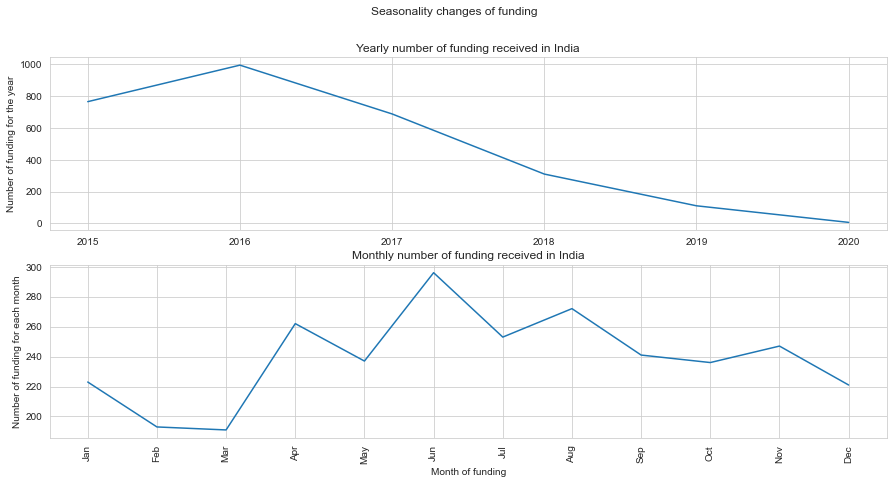

In [46]:
#Make plot
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (15, 7)

sns.set_style("whitegrid")

plt.subplot(2, 1, 1)
sns.lineplot(Year_funding.index, Year_funding.values, palette = "copper")
plt.xticks(rotation = 0)
plt.ylabel("Number of funding for the year")
plt.title("Yearly number of funding received in India")

plt.subplot(2, 1, 2)
sns.lineplot(Month_funding.index, Month_funding.values, palette = "copper")
plt.xticks([i for i in range(1, 13)], ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation = 90)
plt.xlabel("Month of funding")
plt.ylabel("Number of funding for each month")
plt.title("Monthly number of funding received in India")


plt.suptitle("Seasonality changes of funding")
plt.show()

Text(0.5, 1.0, 'Season Changes of funding')

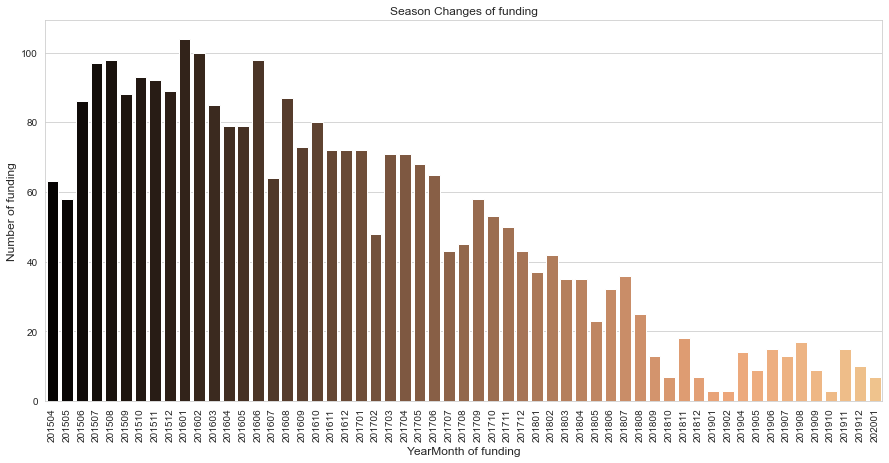

In [65]:
#Season of fundings
sns.set_style("whitegrid")
sns.barplot(Season_funding.index, Season_funding.values, palette = "copper")
plt.xticks(rotation = 90)
plt.ylabel("Number of funding", fontsize = 12)
plt.xlabel("YearMonth of funding", fontsize = 12)
plt.title("Season Changes of funding")

In [562]:
data.head(2)

,Serial_No,Date,StartupName,IndustryVertical,SubVerical,City,InvestorsName,InvestmentType,AmountUSD,YearMonth,Year,Month
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0,202001,2020,1
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0,202001,2020,1


In [47]:
data["AmountUSD"] = data["AmountUSD"].replace(-999, 0)  

In [48]:
#minimum, maximum, median and mean amount of amount recieved generally by India StartUps

print("The average amonut received by India StartUp is:", data["AmountUSD"].dropna().mean())
print("The maximum amonut received by India StartUp is:", data["AmountUSD"].dropna().max())
print("The median amonut received by India StartUp is:", data["AmountUSD"].dropna().median())
print("The minmum amonut received by India StartUp is:", data["AmountUSD"].dropna().min())

The average amonut received by India StartUp is: 16498125.378830083
The maximum amonut received by India StartUp is: 3900000000.0
The median amonut received by India StartUp is: 500000.0
The minmum amonut received by India StartUp is: 0.0


In order to detetmine how the data(amounts) is distributed, we plot a `histogram` to vizualize the distribution

Text(0.5, 1.0, 'Histogram Distribution distribution of the funding received')

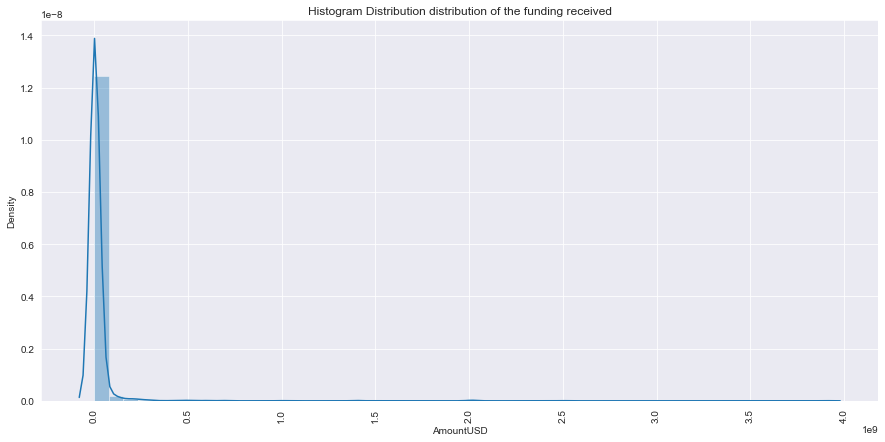

In [49]:
sns.set_style("darkgrid")
plt.subplot(1, 1, 1)
sns.distplot(data["AmountUSD"])
plt.xticks(rotation = 90)
plt.title("Histogram Distribution distribution of the funding received")

In [625]:
data.head(1)

,Serial_No,Date,StartupName,IndustryVertical,SubVerical,City,InvestorsName,InvestmentType,AmountUSD,YearMonth,Year,Month
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0,202001,2020,1


# StartUp Name

To Visualize the the startup name column, we ask the following questions such as
>- The number and amount of investments each startup has?
>- Top N and Bottom N startups by amount and by number of funding received

In [50]:
Amount_group = pd.pivot_table(data, index = "StartupName", values = "AmountUSD", aggfunc = ["count", "mean", "sum"])

In [51]:
#Top N and Bottom N by number of investment received

NTop_count = Amount_group["count"]["AmountUSD"].sort_values(ascending = False)
NBottom_count = Amount_group["count"]["AmountUSD"].sort_values()

NTop_sum = Amount_group["sum"]["AmountUSD"].sort_values(ascending = False)
NBottom_sum = Amount_group["sum"]["AmountUSD"].sort_values()

In [52]:
print("The top 5 startups by number of investment they received:")
display(NTop_count[:5])

print("\n")
print("The top 5 startups by amount of investment they received:")
display(NTop_sum[:5])

print("\n")
print("The bottom 5 startups by number of investment they received:")
display(NBottom_count[:5])

print("\n")
print("The bottom 5 startups by amount of investment they received:")
display(NBottom_sum[:5])

The top 5 startups by number of investment they received:


StartupName
Ola Cabs     8
Swiggy       8
UrbanClap    6
Nyk          6
Medinfi      6
Name: AmountUSD, dtype: int64



The top 5 startups by amount of investment they received:


StartupName
Flipkart            4.059700e+09
Rapido Bike Taxi    3.900000e+09
Paytm               3.148950e+09
News in shorts      2.020000e+09
Loylty Rewards      2.019350e+09
Name: AmountUSD, dtype: float64



The bottom 5 startups by number of investment they received:


StartupName
"BYJU\\'S"        1
Portea Medical    1
Porte             1
PortDesk          1
Policy Bazaar     1
Name: AmountUSD, dtype: int64



The bottom 5 startups by amount of investment they received:


StartupName
MotoMojo           0.0
Karma Recycling    0.0
Healthians.com     0.0
EasyFi             0.0
EasyGov            0.0
Name: AmountUSD, dtype: float64

To follow up on the data above, we would check data concerning the top 5 startups by amounts and counts of investment they received. We evaluate details such as the investor and the kind of investment they received and the location of the investment.

In [53]:
#Check Amount Groups(pivot table we created) for startups with the highest funding by amount
print("The top 5 groups by amount they have received:\n")
display(Amount_group.loc[["Flipkart", "Rapido Bike Taxi",
             "Paytm", "News in shorts", "Loylty Rewards"]])

#Check Amount Groups for startups with the highest funding by counts
print("\nThe top 5 groups by count of investment they have received:\n")
display(Amount_group.loc[["Ola Cabs", "Swiggy",
             "UrbanClap", "Nyk", "Medinfi"]])

The top 5 groups by amount they have received:



,count,mean,sum
,AmountUSD,AmountUSD,AmountUSD
StartupName,,,
Flipkart,5,8.119400e+08,4.059700e+09
Rapido Bike Taxi,1,3.900000e+09,3.900000e+09
Paytm,5,6.297900e+08,3.148950e+09
News in shorts,1,2.020000e+09,2.020000e+09
Loylty Rewards,1,2.019350e+09,2.019350e+09



The top 5 groups by count of investment they have received:



,count,mean,sum
,AmountUSD,AmountUSD,AmountUSD
StartupName,,,
Ola Cabs,8,8.371250e+07,669700000.0
Swiggy,8,3.381250e+07,270500000.0
UrbanClap,6,1.011667e+07,60700000.0
Nyk,6,3.566667e+07,214000000.0
Medinfi,6,1.300000e+05,780000.0


In [54]:
#Check the investment, investment type and investment related information for startups that have highest by amount rceived

y = (data["StartupName"] == "Flipkart") | (data["StartupName"] == "Rapido Bike Taxi")
x = (data["StartupName"] == "Paytm") | (data["StartupName"] == "News in shorts")
z = x | y
a = z| (data["StartupName"] == "Loylty Rewards")
#Using the truth table above to slice the table - #a is the resulting truth table series
new_data = data[a]
print("More Information about the top companies by amount they have received:\n")
display(new_data[["StartupName", "InvestorsName", "InvestmentType", "IndustryVertical"]].sort_values(by = "StartupName"))
display(new_data["IndustryVertical"].value_counts())

#Check the investment, investment type and investment related information for startups that have highest by count

y1 = (data["StartupName"] == "Ola Cabs") | (data["StartupName"] == "Swiggy")
x1 = (data["StartupName"] == "UrbanClap") | (data["StartupName"] == "Nyk")
z1 = x1 | y1
a1 = z1| (data["StartupName"] == "Medinfi")
#Using the truth table above to slice the table
new_data1 = data[a1]
print("\nMore Information about the top companies by count of investments thay have received:\n")
display(new_data1[["StartupName", "InvestorsName", "InvestmentType", "IndustryVertical"]].sort_values(by = "StartupName"))
display(new_data1["IndustryVertical"].value_counts())

More Information about the top companies by amount they have received:



,StartupName,InvestorsName,InvestmentType,IndustryVertical
651,Flipkart,Softbank,Private Equity,eCommerce
773,Flipkart,Naspers,Private Equity,eCommerce
966,Flipkart,"Microsoft, eBay, Tencent Holdings",Private Equity,eCommerce
1032,Flipkart,"Bennett, Coleman and Co. Ltd (BCCL)",Private Equity,eCommerce
2689,Flipkart,Morgan Stanley,Private Equity,eCommerce platform
2608,Loylty Rewards,IndianIdeas.com,Private Equity,Premium Loyalty Rewards Point Management
2602,News in shorts,Tiger Global,Private Equity,News Aggregator mobile app
31,Paytm,Vijay Shekhar Sharm,Funding Round,FinTech
251,Paytm,One 97 Communications,Private Equity,Technology
830,Paytm,SoftBank Group,Private Equity,ECommerce


eCommerce                                   5
ECommerce                                   1
Transportation                              1
Premium Loyalty Rewards Point Management    1
eCommerce platform                          1
FinTech                                     1
Technology                                  1
E-Commerce & M-Commerce platform            1
News Aggregator mobile app                  1
Name: IndustryVertical, dtype: int64


More Information about the top companies by count of investments thay have received:



,StartupName,InvestorsName,InvestmentType,IndustryVertical
670,Medinfi,"PBS Srinivas, Vinod Martin,",Seed Funding,Consumer Internet
2257,Medinfi,"Ram Kumar Kakani, Pradeep K Jaisingh, Sunil T ...",Seed Funding,Health-Tech platform
1962,Medinfi,"Rajnish Sinha, Prijit Debnath, Kanchan Ghoshal",Seed Funding,Consumer Internet
1413,Medinfi,"Mudit Saxena, Evan Lim",Seed Funding,Consumer Internet
985,Medinfi,"Vinod Martin, Hemant Kaul, Prof. Ram Kumar Kak...",Seed Funding,Consumer Internet
1057,Medinfi,"Vinod Martin, Evan Lim, Kanchan Ghoshal, Ram K...",Seed Funding,Consumer Internet
1364,Nyk,"Sunil Munjal, Mariwala family",Private Equity,eCommerce
156,Nyk,Lighthouse,Private Equity,Consumer Internet
263,Nyk,"Sunil Munjal, Harsh Mariwala, Dalip Pathak and...",Private Equity,Consumer Internet
305,Nyk,"Sunil Munjal, Harsh Mariwala, Dalip Pathak and...",Private Equity,Consumer Internet


Consumer Internet                                   18
Online Food Delivery                                 2
Cab rental Mobile app                                2
eCommerce                                            2
Beauty & Wellness Products e-tailer                  1
Mobile Services Marketplace                          1
Transport                                            1
Online Food Ordering                                 1
Health-Tech platform                                 1
Hyperlocal services marketplace                      1
Hyperlocal Mobile Services Marketplace               1
Food and Beverages                                   1
Cab Booking app platform                             1
Hyperlocal On-Demand Household Services platform     1
Name: IndustryVertical, dtype: int64

**Interpretation** 
> From the above we can see that high number of funding received does not equal to high amount of cash received by the startups.
However, one common thing is the type Investment received by the top startups(By count and amounts received), which is the **Private Equity**

> However, when we investigate further, we discover that startups which are under the `ecommerce section` seem to attract large money while `consumer internet` which is the major industry vertical for the high number of donations section did not attract up to the commerce section.

This would lead us to try and see more information concerning the industry vertical column

In [175]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [178]:
go.pie?

Type:        module
String form: <module 'plotly.graph_objs.pie' from 'C:\\Users\\Dell\\anaconda3\\lib\\site-packages\\plotly\\graph_objs\\pie\\__init__.py'>
File:        c:\users\dell\anaconda3\lib\site-packages\plotly\graph_objs\pie\__init__.py
Docstring:   <no docstring>


In [69]:
data.sample()

,Serial_No,Date,StartupName,IndustryVertical,SubVerical,City,InvestorsName,InvestmentType,AmountUSD,YearMonth,Year,Month
344,345,26/03/2018,Cash Suvidh,Consumer Internet,Online loan platform,Delhi,"Initia Holdings,Vipin Agarwal and others.",Seed / Angel Funding,1000000.0,201803,2018,3


In [721]:
#Before we start for the industry vertical, let us run some few analyses on the Investment Type analysis

In [55]:
#Let us clean the column #Function is one time ca
data["InvestmentType"] = data["InvestmentType"].replace((r"(?i)Angel.*", r"Seed.*", r"(?i).*Debt.*", r"Equity.*", 
                                                         r"(?i)pre.*series.*A",
                                                        r"(?i).*series.*B", r"(?i)Private.*", r"(?i)venture.*"),
                                                        
                                                           ("Angel/Seed Funding", "Angel/Seed Funding", "Debt Funding", 
                                                            "Equity Based Funding", "Pre Series A", "Series B", 
                                                            "Private Equity", "Venture Funding"), regex = True)

In [56]:
#Using String Replace to correct error replacements from the above replace method
data["InvestmentType"] = data["InvestmentType"].str.replace("Angel/Angel/Seed Funding", "Angel/Seed Funding")

In [58]:
data["InvestmentType"] = data["InvestmentType"].replace("Series B (Extension)", "Series B")

In [59]:
data["InvestmentType"].value_counts().sort_values(key = lambda x: x.index)

Angel/Seed Funding        1456
Bridge Round                 1
Corporate Round              2
Debt Funding                29
Equity Based Funding         3
Funding Round                1
Inhouse Funding              1
Maiden Round                 1
Mezzanine                    1
Pre Series A                 9
Private Equity            1280
Series A                    24
Series B                    21
Series C                    14
Series D                    12
Series E                     2
Series F                     2
Series G                     1
Series H                     1
Series J                     1
Single Venture Funding       1
Term Loan                    1
Venture Funding              4
Name: InvestmentType, dtype: int64

Concerning the investment type, let us see how private equity investment type contributed to the ecosyestem

In [60]:
data["InvestmentType"].value_counts()[:4]

Angel/Seed Funding    1456
Private Equity        1280
Debt Funding            29
Series A                24
Name: InvestmentType, dtype: int64

In [61]:
#percentage of investment type that are from private equity
data["InvestmentType"].value_counts()['Private Equity']/len(data) * 100

44.56824512534819

In [62]:
data["InvestmentType"].value_counts()['Angel/Seed Funding']/len(data) * 100

50.69637883008357

> It is worthy to note that about 44% of the investment type are from private equity, which is only superceded by Angel/Seed Funding Type which contributed up to 50%. Together they contributed about 94% to the startup investment ecosystem

# Industry Vertical

In order to find information about the industry vertical, we need to clean the data and ask the following questions for impact

> The effect of the industry you are to investors and investment that you attract

In [88]:
data.sample()

,Serial_No,Date,StartupName,IndustryVertical,SubVerical,City,InvestorsName,InvestmentType,AmountUSD,date,YearMonth,Year,Month
2373,2374,29/10/2015,ZopHop,Public Commute helper App,Others,Mumbai,"Amit Singhal, PK Gulati & others",Angel/Seed Funding,450000.0,29/10/2015,201510,2015,10


In [63]:
pd.set_option("max_rows", 4000)
data["IndustryVertical"].value_counts().sort_values(key = lambda x: x.index)

360-degree view creating platform                               1
3D Printer Manufacturer                                         1
AI                                                              1
API Workflow platform                                           1
Accounting                                                      1
Activity Based Social Network                                   1
Advertising & Marketing Community Networking platform           1
Advertising, Marketing                                          1
Aerospace                                                       1
Affordable Education                                            1
Affordable Hotel Booking Online                                 1
Agriculture                                                     2
Agtech                                                          1
Algorithmic Match Making Platform                               1
Alternate Mobile Monetization platform                          1
App Analyt

In [64]:
#Change all text to lower text to avoid mismatching

data["IndustryVerical"] = data["IndustryVertical"].apply(lambda x: x.lower())

In [65]:
#Strip Data of leading spaces

data["IndustryVerical"] = data["IndustryVertical"].str.strip()

In [66]:
print("The number of categories present are:", str(len(data["IndustryVertical"].value_counts().index)))

The number of categories present are: 820


Since It is quite a large group of categories, we will be picking and cleaning the first few industries by count and amount of investment they attracted using the pivot table or group by function

In [67]:
Industry_group = pd.pivot_table(data, index = "IndustryVertical", values = "AmountUSD", aggfunc = ["count", "mean", "sum"])

In [68]:
Industry_group.head()

,count,mean,sum
,AmountUSD,AmountUSD,AmountUSD
IndustryVertical,,,
360-degree view creating platform,1,0.0,0.0
3D Printer Manufacturer,1,3000000.0,3000000.0
AI,1,0.0,0.0
API Workflow platform,1,1000000.0,1000000.0
Accounting,1,5000000.0,5000000.0


In [69]:
NTop_Ind_count = Industry_group["count"]["AmountUSD"].sort_values(ascending = False)
NBottom_Ind_count = Industry_group["count"]["AmountUSD"].sort_values()

NTop_Ind_sum = Industry_group["sum"]["AmountUSD"].sort_values(ascending = False)
NBottom_Ind_sum = Industry_group["sum"]["AmountUSD"].sort_values()

NTop_Ind_mean = Industry_group["mean"]["AmountUSD"].sort_values(ascending = False)

Text(0, 0.5, 'Industry Vertical')

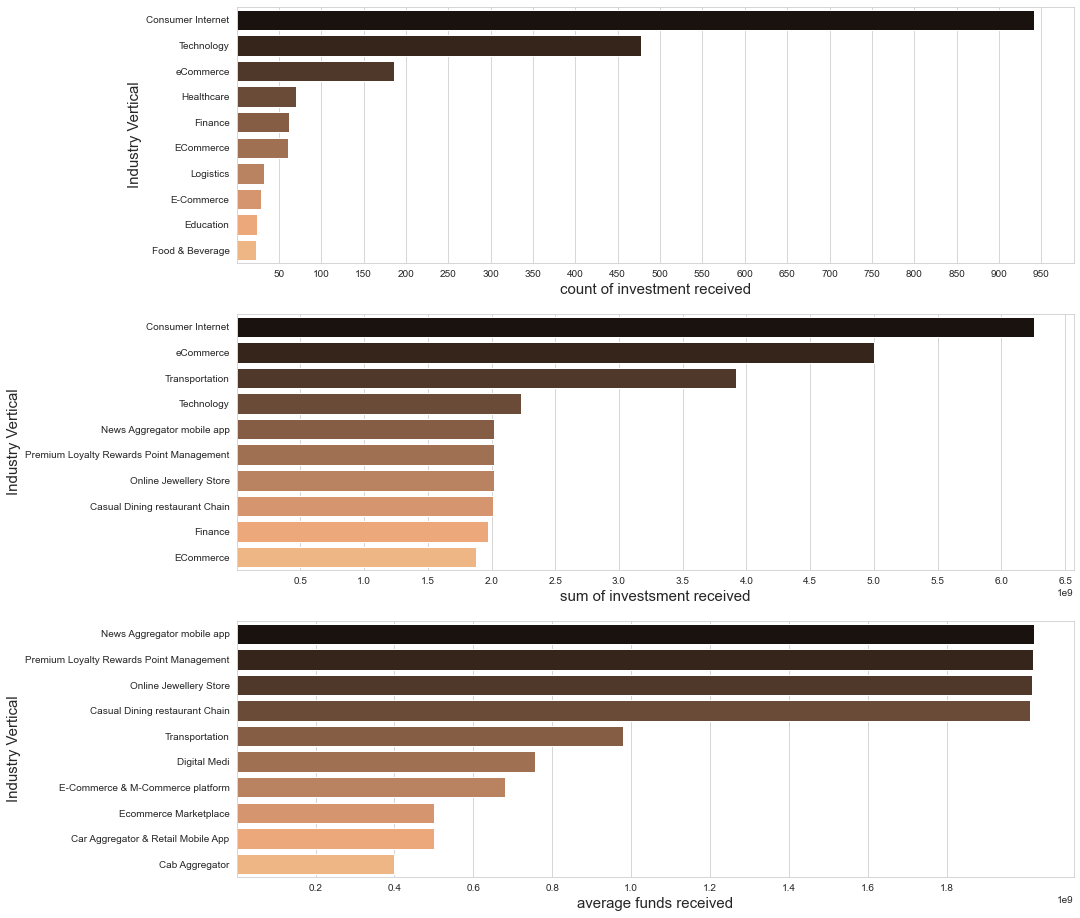

In [135]:
TopTen_Ind_count = NTop_Ind_count[:10]
TopTen_Ind_sum = NTop_Ind_sum[:10]
TopTen_Ind_mean = NTop_Ind_mean[:10]

#Taking a Barplot of the respective items

plt.rcParams["figure.figsize"] = (15, 16)

sns.set_style("whitegrid")
plt.subplot(3, 1, 1)
sns.barplot(y = TopTen_Ind_count.index, x = TopTen_Ind_count.values, palette = "copper")
plt.xticks([i for i in range(50, 1000, 50)],rotation = 0)
plt.xlabel("count of investment received", fontsize = 15)
plt.ylabel("Industry Vertical", fontsize = 15)

plt.subplot(3, 1, 2)
sns.barplot(y = TopTen_Ind_sum.index, x = TopTen_Ind_sum.values, palette = "copper")
plt.xticks([i for i in range(500000000, 7000000000, 500000000)], rotation = 0)
plt.xlabel("sum of investsment received", fontsize = 15)
plt.ylabel("Industry Vertical", fontsize = 15)

plt.subplot(3, 1, 3)
sns.barplot(y = TopTen_Ind_mean.index, x = TopTen_Ind_mean.values, palette = "copper")
plt.xticks([i for i in range(200000000, 2000000000, 200000000)], rotation = 0)
plt.xlabel("average funds received", fontsize = 15)
plt.ylabel("Industry Vertical", fontsize = 15)

>- In order to consider and compare the top industrial categories, let us specify criteria to select the categories we will be considering.
>- We then go ahead to compare all their mean, count and sum of amounts each category received
>- **Crtiteria:** count>50 and sum > 1.0B, mean>0.4B

In [123]:
Industry_group.head()

,count,mean,sum
,AmountUSD,AmountUSD,AmountUSD
IndustryVertical,,,
360-degree view creating platform,1,0.0,0.0
3D Printer Manufacturer,1,3000000.0,3000000.0
AI,1,0.0,0.0
API Workflow platform,1,1000000.0,1000000.0
Accounting,1,5000000.0,5000000.0


In [70]:
j_ = (Industry_group["count"]["AmountUSD"] > 30) | (Industry_group["sum"]["AmountUSD"] > 1000000000)  #Generate a series that takes a logical comparism

In [71]:
TopInd_Vert = Industry_group[j_| (Industry_group["mean"]["AmountUSD"] > 400000000)]

In [72]:
TopInd_Vert.shape

(18, 3)

In [73]:
TopInd_Vert.index.sort_values()

Index(['Car Aggregator & Retail Mobile App', 'Casual Dining restaurant Chain',
       'Consumer Internet', 'Digital Medi', 'E-Commerce',
       'E-Commerce & M-Commerce platform', 'ECommerce',
       'Ecommerce Marketplace', 'FinTech', 'Finance', 'Healthcare',
       'Logistics', 'News Aggregator mobile app', 'Online Jewellery Store',
       'Premium Loyalty Rewards Point Management', 'Technology',
       'Transportation', 'eCommerce'],
      dtype='object', name='IndustryVertical')

**We should do the following after knowing the indices we are dealing with:**
>- Clean the original dataset in respect to the  the given indices
>- Vizualize the comparism between the given vertical 

In [167]:
data.head()

,Serial_No,Date,StartupName,IndustryVertical,SubVerical,City,InvestorsName,InvestmentType,AmountUSD,date,YearMonth,Year,Month,IndustryVerical
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity,200000000.0,09/01/2020,202001,2020,1,E-Tech
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0,13/01/2020,202001,2020,1,Transportation
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital Indi,Series B,18358860.0,09/01/2020,202001,2020,1,E-commerce
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre Series A,3000000.0,02/01/2020,202001,2020,1,FinTech
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Angel/Seed Funding,1800000.0,02/01/2020,202001,2020,1,Fashion and Apparel


In [76]:
print(len(data["IndustryVertical"].value_counts().index))
data["IndustryVertical"].value_counts().sort_values(key = lambda x: x.index, ascending = True)

#Started out with 820 uni1ue variables

820


360-degree view creating platform                               1
3D Printer Manufacturer                                         1
AI                                                              1
API Workflow platform                                           1
Accounting                                                      1
Activity Based Social Network                                   1
Advertising & Marketing Community Networking platform           1
Advertising, Marketing                                          1
Aerospace                                                       1
Affordable Education                                            1
Affordable Hotel Booking Online                                 1
Agriculture                                                     2
Agtech                                                          1
Algorithmic Match Making Platform                               1
Alternate Mobile Monetization platform                          1
App Analyt

In [77]:
#Just to have a copy of the data in case somethiong goes wrong or deprecated
data_copy = data.copy()

In [78]:
data.drop("IndustryVerical", axis = 1, inplace = True)

In [79]:
data["IndustryVertical"] = data["IndustryVertical"].apply(lambda x: x.lower())

In [80]:
print(len(data["IndustryVertical"].value_counts().index))

798


In [181]:
data["IndustryVertical"] = data["IndustryVertical"].str.strip()

In [ ]:
TopInd_Vert.index.sort_values()

Index(['Car Aggregator & Retail Mobile App', 'Casual Dining restaurant Chain',
       'Consumer Internet', 'Digital Medi', 'E-Commerce',
       'E-Commerce & M-Commerce platform', 'ECommerce',
       'Ecommerce Marketplace', 'FinTech', 'Finance', 'Healthcare',
       'Logistics', 'News Aggregator mobile app', 'Online Jewellery Store',
       'Premium Loyalty Rewards Point Management', 'Technology',
       'Transportation', 'eCommerce'],
      dtype='object', name='IndustryVertical')

In [90]:
data["IndustryVertical"] = data["IndustryVertical"].replace(("app.*", 
                                                             "artificial.*", "b2b.*", "beauty.*",
                                                            ".*data.*", "cab.*", "car.*",
                                                            "auto.*rickshaw", "cloud.*", 
                                                            "consumer interne|consumer internet",
                                                            "consumer.*", 
                                                            "digital.*", "e.*commerce.*", "ecommece",
                                                             "ed.*tech.*", "education.*", "ed-tech", 
                                                             ".*logistics.*", ".*fashion.*", ".*health.*",
                                                            ".*doctor.*", ".*energy.*", "fiinance", 
                                                            "financ.*", ".*fin.*tech", ".*food.*", "fmcg", 
                                                             ".*hotel.*", ".*meal.*", 
                                                            ".*fitnes.*", ".*gym.*", "hyper.*"), 
                                                            
                                                           ("app based", "artifical Intelligence","b2b", 
                                                            "beauty services", "data science services", 
                                                           "logistics", "logistics", "logistics",
                                                            "cloud services", 
                                                           "consumer goods and technology",
                                                           "consumer goods and technology",
                                                           "digital services", "e-commerce",
                                                           "e-commerce",
                                                           "ed-tech", "educational products and services",
                                                          "educational products and services", "logistics",
                                                           "fashion industry", "health services", 
                                                            "health services",
                                                           "energy solutions and innovations", "finance",
                                                            "financial services & fin-tech", 
                                                           "financial services & fin-tech",
                                                           "consumer goods and technology",
                                                           "consumer goods and technology",
                                                           "logistics", "consumer goods and technology",
                                                           "fitness services", "fitness services", "hyper local businesses"), regex = True)

In [92]:
print(len(data["IndustryVertical"].value_counts().index))

512


**Reduced unique variables from 820 to 512:**
This could get better especially with better understanding of the dataset.

In [96]:
data_copy = data.copy() #Updating and pickling my dataset for future use

import dill

with open("India_StartUp.dill", "wb") as f:
    dill.dump(data_copy, f)

>- The next thing is to create a list of top industry verticalas using the criteria we used before
>- Then use the created list to subset the whole dataframe
>- Then group the subsetted dataframe and make vizualiztions from the table

   To do these, we would first need to reconstruct our industry group pivot tables

In [109]:
Industry_group = pd.pivot_table(data, index = "IndustryVertical", values = "AmountUSD", aggfunc = ["count", "mean", "sum"])
Industry_group.head()

,count,mean,sum
,AmountUSD,AmountUSD,AmountUSD
IndustryVertical,,,
360-degree view creating platform,1,0.0,0.0
3d printer manufacturer,1,3000000.0,3000000.0
accounting,1,5000000.0,5000000.0
activity based social network,1,0.0,0.0
advertising & marketing community networking platform,1,1000000.0,1000000.0


In [110]:
j_ = (Industry_group["count"]["AmountUSD"] > 30) | (Industry_group["sum"]["AmountUSD"] > 1000000000)  #Generate a series that takes a logical comparism

In [111]:
TopInd_Vertical = Industry_group[j_| (Industry_group["mean"]["AmountUSD"] > 400000000)]

In [112]:
TopInd_Vertical.shape

(13, 3)

In [113]:
TopInd_Vertical.index

Index(['casual dining restaurant chain', 'consumer goods and technology',
       'digital services', 'e-commerce', 'educational products and services',
       'financial services & fin-tech', 'health services', 'logistics',
       'news aggregator mobile app based', 'online jewellery store',
       'premium loyalty rewards point management', 'technology',
       'transportation'],
      dtype='object', name='IndustryVertical')

In [114]:
TopInd_Vertical.style.background_gradient(cmap = "Reds")

,count,mean,sum
,AmountUSD,AmountUSD,AmountUSD
IndustryVertical,,,
casual dining restaurant chain,1,2010000000.000000,2010000000.000000
consumer goods and technology,1032,6611867.674419,6823447440.000000
digital services,14,110191800.000000,1542685200.000000
e-commerce,316,31953459.718354,10097293271.000000
educational products and services,49,10649123.775510,521807065.000000
financial services & fin-tech,93,37685475.967742,3504749265.000000
health services,111,9564225.225225,1061629000.000000
logistics,105,19240666.666667,2020270000.000000


In [119]:
TopInd_Vertical.columns = TopInd_Vertical.columns.droplevel(1)

In [168]:
TopInd_sorted = TopInd_Vertical.sort_values("count", ascending = False)
TopInd_sorted.style.background_gradient(cmap = "Reds")

,count,mean,sum
IndustryVertical,,,
consumer goods and technology,1032,6611867.674419,6823447440.000000
technology,478,4664660.941423,2229707930.000000
e-commerce,316,31953459.718354,10097293271.000000
health services,111,9564225.225225,1061629000.000000
logistics,105,19240666.666667,2020270000.000000
financial services & fin-tech,93,37685475.967742,3504749265.000000
educational products and services,49,10649123.775510,521807065.000000
digital services,14,110191800.000000,1542685200.000000
transportation,4,979158098.500000,3916632394.000000


Text(0.5, 1.0, 'Barplot comparing the sum and count of different industry vertical')

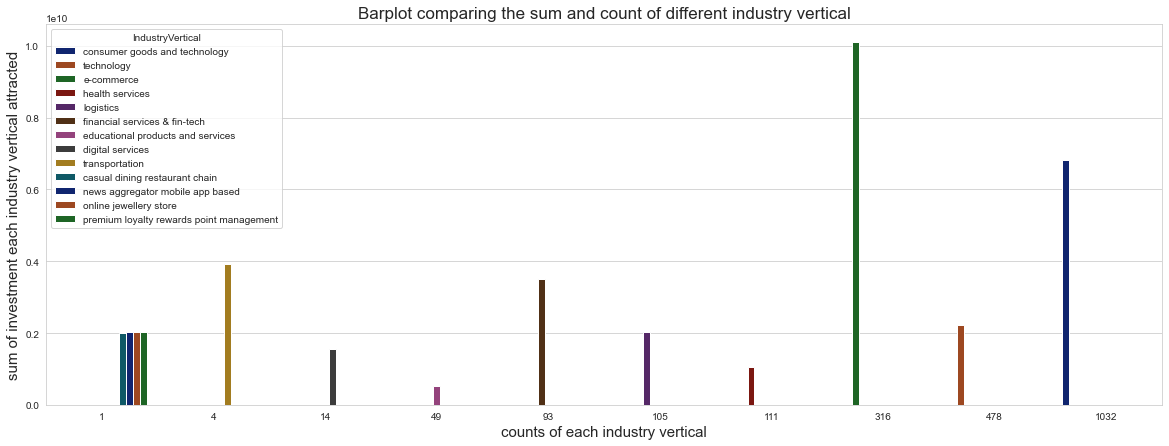

In [235]:
sns.barplot(x = TopInd_sorted["count"], y = TopInd_sorted["sum"], hue = TopInd_sorted.index, data = TopInd_sorted, palette = "dark")
plt.xlabel("counts of each industry vertical", fontsize = 15)
plt.ylabel("sum of investment each industry vertical attracted", fontsize = 15)
plt.title("Barplot comparing the sum and count of different industry vertical", fontsize = 17)

From what is seen above in the plots and styled background table, we can deduct the the following:
>- Count of investment attracted does not mean high sum of money is attracted
>- The `financial services` count is only 93 and `transportation` is only 4 but both individually attracted more than half the money that `consumer goods and technology` attracted, which attracted the highest number and interest of investors (1032 investors)
>- The `e-commerce` section attracted both a large interests (numerical counts) of investors, 316 and is the mostly funded by sum with more than 10B funding

# Using the Location Column

To check the effect of the city on the number of investment attracted

In [212]:
data["City"].nunique()

107

In [217]:
data.loc[data["City"]=="Bengaluru", "City"] = "Bangalore"

In [222]:
data["City"] = data["City"].fillna(data["City"].mode()[0])

In [231]:
location = data["City"].value_counts().head(10)

In [232]:
location

Bangalore    851
Mumbai       568
New Delhi    423
Gurgaon      291
Pune         105
Hyderabad     99
Chennai       97
Noid          93
Gurugram      50
Ahmedabad     38
Name: City, dtype: int64

Text(0.5, 1.0, 'Barplot of count of investments by location')

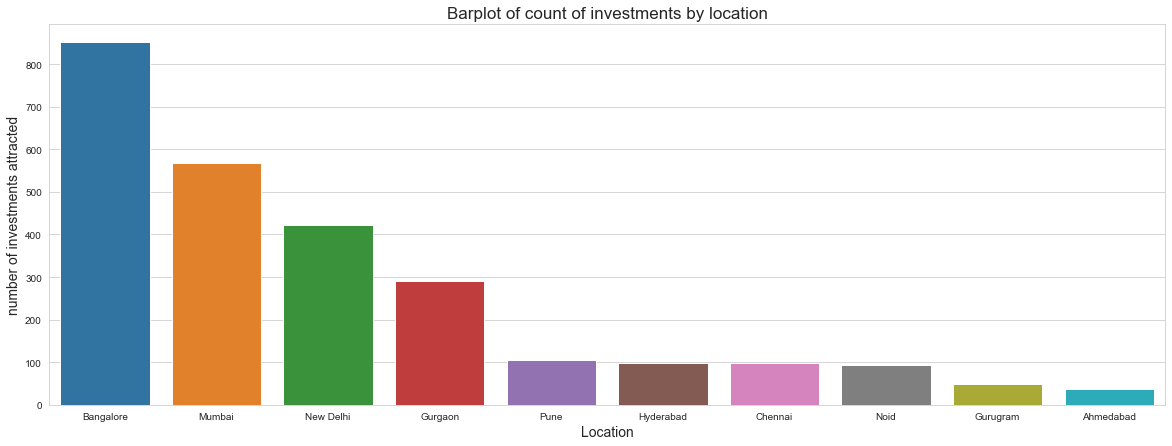

In [237]:
sns.barplot(location.index, location.values)
plt.xlabel("Location", fontsize = 14)
plt.ylabel("number of investments attracted", fontsize = 14)
plt.title("Barplot of count of investments by location", fontsize = 17)

- The top three columns in this category are: Bangalore, Mumbai and New Delhi

# Using wordCloud to vizualize the StartUp Name column

In [240]:
data.columns

Index(['Serial_No', 'Date', 'StartupName', 'IndustryVertical', 'SubVerical',
       'City', 'InvestorsName', 'InvestmentType', 'AmountUSD', 'date',
       'YearMonth', 'Year', 'Month'],
      dtype='object')

In [243]:
l_ = ["a", "b", "c", "c", "d"]

In [245]:
from wordcloud import WordCloud

In [255]:
names = data[~data["StartupName"].isnull()]["StartupName"]

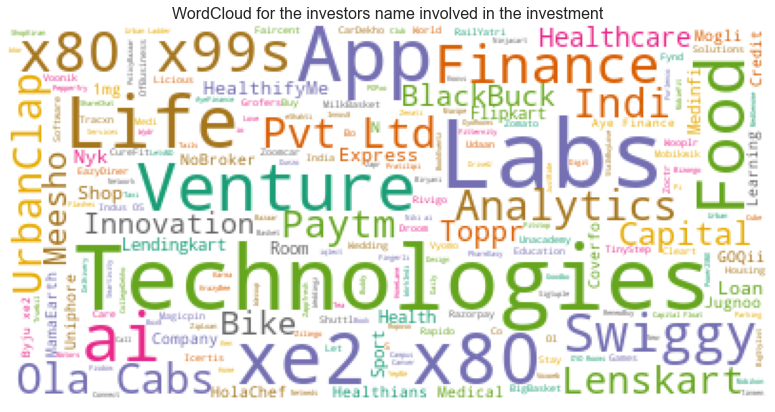

In [277]:
a = WordCloud(max_font_size = 50, background_color = "white", colormap = "Dark2_r").generate(" ".join(names))
plt.imshow(a)
plt.axis("off")
plt.title("WordCloud for the investors name involved in the investment", fontsize = 16)
plt.show()